In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

Classen dataset is a panel data which gives me the dependent variable that is "Support for Democracy".
It includes 141 countries and last 30 year.
Classen data can be found in the following website (democratic mood): http://chrisclaassen.com/data.html 

Another essential dataset is V-Dem. It gives me an index that let me categorize the regimes of the countries.

My independent variables are all potential ties between countries. Those ties can be cultural and economic.

Bilateral Trade Data comes from Gravity dataset, FDI comes from UNCTAD, Classen comes from the website that I indicated,
ISO (for country names) comes from https://www.iso.org/iso-3166-country-codes.html


1) Download Gracity dataset from following website: http://www.cepii.fr/CEPII/en/bdd_modele/bdd_modele_item.asp?id=8

BILATERAL TRADE, DISTANCE TO DEMCORACIES AND AUTOCRACIES, GDP

Gravity dataset does not include coutnry names, they have numerically. So I merge it with ISO Dataset.

In [2]:
# COUNTRY NAMES
df_iso = pd.read_csv("C:/Users/asus/Desktop/classen/GRAVITY_TRADE_CEPII/Gravity_csv_V202102/Countries_V202102.csv")

In [3]:
df_iso.head(5)

,iso3,iso3num,country,countrylong,first_year,last_year,countrygroup_iso3,countrygroup_iso3num
0,AFG,4.0,Afghanistan,Islamic Republic of Afghanistan,NaN,NaN,NaN,NaN
1,ALB,8.0,Albania,Republic of Albania,NaN,NaN,NaN,NaN
2,DZA,12.0,Algeria,People's Democratic Republic of Algeria,NaN,NaN,NaN,NaN
3,ASM,16.0,American Samoa,American Samoa,NaN,NaN,NaN,NaN
4,AND,20.0,Andorra,Principality of Andorra,NaN,NaN,NaN,NaN


In [4]:
iso_selected = df_iso[["iso3", "country"]]

In [5]:
# read the gravity data
gravity = pd.read_csv("C:/Users/asus/Desktop/classen/GRAVITY_TRADE_CEPII/Gravity_csv_V202102/Gravity_V202102.csv")

C:\Users\asus\AppData\Local\Temp\ipykernel_14008\1266223904.py:2: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  gravity = pd.read_csv("C:/Users/asus/Desktop/classen/GRAVITY_TRADE_CEPII/Gravity_csv_V202102/Gravity_V202102.csv")


In [6]:
gravity.columns

Index(['year', 'iso3_o', 'iso3_d', 'iso3num_o', 'iso3num_d',
       'country_exists_o', 'country_exists_d', 'gmt_offset_2020_o',
       'gmt_offset_2020_d', 'contig', 'dist', 'distw', 'distcap', 'distwces',
       'dist_source', 'comlang_off', 'comlang_ethno', 'comcol', 'comrelig',
       'col45', 'legal_old_o', 'legal_old_d', 'legal_new_o', 'legal_new_d',
       'comleg_pretrans', 'comleg_posttrans', 'transition_legalchange',
       'heg_o', 'heg_d', 'col_dep_ever', 'col_dep', 'col_dep_end_year',
       'col_dep_end_conflict', 'empire', 'sibling_ever', 'sibling',
       'sever_year', 'sib_conflict', 'pop_o', 'pop_d', 'gdp_o', 'gdp_d',
       'gdpcap_o', 'gdpcap_d', 'pop_source_o', 'pop_source_d', 'gdp_source_o',
       'gdp_source_d', 'gdp_ppp_o', 'gdp_ppp_d', 'gdpcap_ppp_o',
       'gdpcap_ppp_d', 'pop_pwt_o', 'pop_pwt_d', 'gdp_ppp_pwt_o',
       'gdp_ppp_pwt_d', 'gatt_o', 'gatt_d', 'wto_o', 'wto_d', 'eu_o', 'eu_d',
       'rta', 'rta_coverage', 'rta_type', 'entry_cost_o', 'entry_cos

In [7]:
# Merge Gravity data set with the ISO, so I have the country names for iso3_o
gravity1 = gravity.merge(iso_selected, how="left", left_on = "iso3_o", right_on="iso3")

In [8]:
gravity1.head()

,year,iso3_o,iso3_d,iso3num_o,iso3num_d,country_exists_o,country_exists_d,gmt_offset_2020_o,gmt_offset_2020_d,contig,...,entry_tp_o,entry_tp_d,tradeflow_comtrade_o,tradeflow_comtrade_d,tradeflow_baci,manuf_tradeflow_baci,tradeflow_imf_o,tradeflow_imf_d,iso3,country
0,1948,ABW,ABW,533.0,533.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABW,Aruba
1,1949,ABW,ABW,533.0,533.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABW,Aruba
2,1950,ABW,ABW,533.0,533.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABW,Aruba
3,1951,ABW,ABW,533.0,533.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABW,Aruba
4,1952,ABW,ABW,533.0,533.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABW,Aruba


In [9]:
#drop the ISO3, since I have it already in the gravity data set.
gravity1.drop("iso3", axis=1, inplace=True)

In [10]:
# relocate the column
name_origin = gravity1.pop("country")
gravity1.insert(2, "country", name_origin)

In [11]:
# rename the country column
gravity1.rename(columns={"country": "country_origin"}, inplace=True)

In [127]:
gravity1.head()

,year,iso3_o,country_o,regime_o,iso3_d,country_d,regime_d,iso3num_o,iso3num_d,country_exists_o,...,entry_time_o,entry_time_d,entry_tp_o,entry_tp_d,tradeflow_comtrade_o,tradeflow_comtrade_d,tradeflow_baci,manuf_tradeflow_baci,tradeflow_imf_o,tradeflow_imf_d
0,1948,AFG,Afghanistan,0.0,AFG,Afghanistan,0.0,4.0,4.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1949,AFG,Afghanistan,0.0,AFG,Afghanistan,0.0,4.0,4.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1950,AFG,Afghanistan,0.0,AFG,Afghanistan,0.0,4.0,4.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1951,AFG,Afghanistan,0.0,AFG,Afghanistan,0.0,4.0,4.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1952,AFG,Afghanistan,0.0,AFG,Afghanistan,0.0,4.0,4.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
gravity1.country_o.unique()

array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina', 'Belarus',
       'Bolivia', 'Brazil', 'Barbados', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', 'Ivory Coast', 'Cameroon', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece',
       'Guatemala', 'Guyana', 'Hong Kong', 'Honduras', 'Croatia', 'Haiti',
       'Hungary', 'Indonesia', 'India', 'Ireland', 'Iran', 'Iraq',
       'Iceland', 'Israel',

In [13]:
# Merge Gravity data set with the ISO, so I have the country names for iso3_d
# Since it is a bilateral data, I have to merge twice (on origin and destination. Here I merge ISO for iso3_d)
gravity1 = gravity1.merge(iso_selected, how="left", left_on = "iso3_d", right_on="iso3")

In [14]:
gravity1.head(2)

,year,iso3_o,country_origin,iso3_d,iso3num_o,iso3num_d,country_exists_o,country_exists_d,gmt_offset_2020_o,gmt_offset_2020_d,...,entry_tp_o,entry_tp_d,tradeflow_comtrade_o,tradeflow_comtrade_d,tradeflow_baci,manuf_tradeflow_baci,tradeflow_imf_o,tradeflow_imf_d,iso3,country
0,1948,ABW,Aruba,ABW,533.0,533.0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABW,Aruba
1,1949,ABW,Aruba,ABW,533.0,533.0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABW,Aruba


In [15]:
#drop the ISO3, since I have it already in the gravity data set.
gravity1.drop("iso3", axis=1, inplace=True)

In [16]:
#relocate the country
name_destination = gravity1.pop("country")
gravity1.insert(4, "country", name_destination)

In [17]:
#rename
gravity1.rename(columns={"country":"country_destination"}, inplace=True)

In [18]:
gravity1.head()

,year,iso3_o,country_origin,iso3_d,country_destination,iso3num_o,iso3num_d,country_exists_o,country_exists_d,gmt_offset_2020_o,...,entry_time_o,entry_time_d,entry_tp_o,entry_tp_d,tradeflow_comtrade_o,tradeflow_comtrade_d,tradeflow_baci,manuf_tradeflow_baci,tradeflow_imf_o,tradeflow_imf_d
0,1948,ABW,Aruba,ABW,Aruba,533.0,533.0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1949,ABW,Aruba,ABW,Aruba,533.0,533.0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1950,ABW,Aruba,ABW,Aruba,533.0,533.0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1951,ABW,Aruba,ABW,Aruba,533.0,533.0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1952,ABW,Aruba,ABW,Aruba,533.0,533.0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
gravity1.to_csv("gravity221011.csv", index=False)

In [1]:
import pandas as pd
import numpy as np

In [21]:
gravity1 = pd.read_csv("C:/Users/asus/Desktop/classen/gravity221011.csv")

C:\Users\asus\AppData\Local\Temp\ipykernel_14008\2241001761.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  gravity1 = pd.read_csv("C:/Users/asus/Desktop/classen/gravity221011.csv")


### Let's merge Gravity1 with v_dem.  V DEM provides me with the index that classify regimes.
So I can see the level of trade between democracies and autocracies 
(If I do not classify regimes I cannot know among what kind of regimes the trade exists)

In [23]:
v_dem = pd.read_csv("C:/Users/asus/Desktop/classen/Country_Year_V-Dem_Full+others_CSV_v12/V-Dem-CY-Full+Others-v12.csv")

C:\Users\asus\AppData\Local\Temp\ipykernel_14008\701740332.py:1: DtypeWarning: Columns (364,365,366,394,410,821,831,832,930,1235,1252,1481,3063,3282,3283,3338,3340,3344,3345,3347,3348,3349) have mixed types. Specify dtype option on import or set low_memory=False.
  v_dem = pd.read_csv("C:/Users/asus/Desktop/classen/Country_Year_V-Dem_Full+others_CSV_v12/V-Dem-CY-Full+Others-v12.csv")


In [24]:
v_dem = v_dem[["country_name", "country_text_id", "year", "v2x_regime"]]

In [25]:
# Make the index binary. Autocracy - Democracy
v_dem["v2x_regime"].replace({0: 0, 1:0, 2:1, 3:1}, inplace=True)
v_dem["v2x_regime"].value_counts()

0.0    14139
1.0     4904
Name: v2x_regime, dtype: int64

In [26]:
v_dem["v2x_regime"].unique()

array([nan,  0.,  1.])

In [27]:
#drop nan!
# wihtout regime type v_dem dataset is useless.
v_dem.dropna(subset=["v2x_regime"], inplace=True)

In [28]:
v_dem.head(2)

,country_name,country_text_id,year,v2x_regime
111,Mexico,MEX,1900,0.0
112,Mexico,MEX,1901,0.0


In [29]:
gravity1.head(2)

,year,iso3_o,country_origin,iso3_d,country_destination,iso3num_o,iso3num_d,country_exists_o,country_exists_d,gmt_offset_2020_o,...,entry_time_o,entry_time_d,entry_tp_o,entry_tp_d,tradeflow_comtrade_o,tradeflow_comtrade_d,tradeflow_baci,manuf_tradeflow_baci,tradeflow_imf_o,tradeflow_imf_d
0,1948,ABW,Aruba,ABW,Aruba,533.0,533.0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1949,ABW,Aruba,ABW,Aruba,533.0,533.0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
### Before merging V_DEM with GRAVITY1 I make sure that 
### Gravity1 dataset has the same country names as CLASSEN dataset
### Since CLASSEN dataset gives me the dependent variable
### It is important GRAVITY1 has the same names.

In [120]:
import pandas as pd
import numpy as np

In [121]:
classen = pd.read_csv("C:/Users/asus/Desktop/classen/classen_vdem.csv")

In [118]:
### I am only interested in the countries exist in Classen dataset, 
# I only need those countries
# So I rename Gravity DATASET according to Classen dataset then will merge Gravity with V-DEM

In [37]:
# see the difference between country names 
# countries that are in classen, but not in gravity as follows:
new_list=[]
for country in classen["country"].unique():
    if country not in gravity1["country_origin"].unique():
        new_list.append(country)      
new_list

['Ivory Coast', 'Macedonia', 'Swaziland']

In [38]:
new_list=[]
for country in classen["country"].unique():
    if country not in gravity1["country_destination"].unique():
        new_list.append(country)      
new_list

['Ivory Coast', 'Macedonia', 'Swaziland']

In [39]:
gravity1["country_origin"] = gravity1["country_origin"].replace({"Cote d'Ivoire":"Ivory Coast",
                                                                "North Macedonia":"Macedonia",
                                                                "Eswatini":"Swaziland"})

In [40]:
gravity1["country_destination"] = gravity1["country_destination"].replace({"Cote d'Ivoire":"Ivory Coast",
                                                                "North Macedonia":"Macedonia",
                                                                "Eswatini":"Swaziland"})

In [41]:
new_list=[]
for country in classen["country"].unique():
    if country not in gravity1["country_destination"].unique():
        new_list.append(country)      
new_list

[]

In [42]:
# see the difference between country names 
# countries that are in classen, but not in gravity as follows:
new_list=[]
for country in classen["country"].unique():
    if country not in gravity1["country_origin"].unique():
        new_list.append(country)      
new_list

[]

In [43]:
set(gravity1["country_origin"])

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire, Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Bouvet Island',
 'Brazil',
 'British Indian Ocean Territory',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Cocos (Keeling) Islands',
 'Colombia',
 'Comoros',
 'Congo, Democratic Rep. of the',
 'Congo, Rep. of the',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Czechoslovakia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 

In [44]:
### merge v_dem with gravity1
### I will merge twice: to have the index for origin and destination

In [45]:
v_dem.head(2)

,country_name,country_text_id,year,v2x_regime
111,Mexico,MEX,1900,0.0
112,Mexico,MEX,1901,0.0


In [46]:
gravity1 = gravity1.merge(v_dem, how="left", right_on=["country_name", "year"], left_on=["country_origin", "year"])

In [47]:
gravity1.drop(columns=["country_name", "country_text_id"], axis=1, inplace=True)

In [48]:
gravity1 = gravity1.dropna(subset=["v2x_regime"])

In [49]:
#relocate the country
regime = gravity1.pop("v2x_regime")
gravity1.insert(3, "v2x_regime", regime)

In [50]:
gravity1 = gravity1.rename(columns={"v2x_regime":"regime_origin"})

In [51]:
gravity1 = gravity1.merge(v_dem, how="left", right_on=["country_name", "year"], left_on=["country_destination", "year"])

In [52]:
gravity1.drop(columns=["country_name", "country_text_id"], axis=1, inplace=True)

In [53]:
gravity1 = gravity1.dropna(subset=["v2x_regime"])

In [54]:
#relocate the country
regime = gravity1.pop("v2x_regime")
gravity1.insert(6, "v2x_regime", regime)

In [55]:
gravity1 = gravity1.rename(columns={"v2x_regime":"regime_destination"})

In [ ]:
gravity1.rename(columns={"country_origin":"country_o", "regime_origin":"regime_o", "country_destination":"country_d",
                       "regime_destination":"regime_d"}, inplace=True)

In [56]:
gravity1.head()

,year,iso3_o,country_origin,regime_origin,iso3_d,country_destination,regime_destination,iso3num_o,iso3num_d,country_exists_o,...,entry_time_o,entry_time_d,entry_tp_o,entry_tp_d,tradeflow_comtrade_o,tradeflow_comtrade_d,tradeflow_baci,manuf_tradeflow_baci,tradeflow_imf_o,tradeflow_imf_d
72,1948,AFG,Afghanistan,0.0,AFG,Afghanistan,0.0,4.0,4.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,1949,AFG,Afghanistan,0.0,AFG,Afghanistan,0.0,4.0,4.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,1950,AFG,Afghanistan,0.0,AFG,Afghanistan,0.0,4.0,4.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,1951,AFG,Afghanistan,0.0,AFG,Afghanistan,0.0,4.0,4.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,1952,AFG,Afghanistan,0.0,AFG,Afghanistan,0.0,4.0,4.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
gravity1.to_csv("gravity221012.csv", index=False)

In [2]:
import pandas as pd
import numpy as np

In [3]:
gravity1 = pd.read_csv("C:/Users/asus/Desktop/classen/gravity221012.csv")

C:\Users\asus\AppData\Local\Temp\ipykernel_10940\1187647874.py:1: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  gravity1 = pd.read_csv("C:/Users/asus/Desktop/classen/gravity221012.csv")


In [4]:
gravity1.head()

,year,iso3_o,country_o,regime_o,iso3_d,country_d,regime_d,iso3num_o,iso3num_d,country_exists_o,...,entry_time_o,entry_time_d,entry_tp_o,entry_tp_d,tradeflow_comtrade_o,tradeflow_comtrade_d,tradeflow_baci,manuf_tradeflow_baci,tradeflow_imf_o,tradeflow_imf_d
0,1948,AFG,Afghanistan,0.0,AFG,Afghanistan,0.0,4.0,4.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1949,AFG,Afghanistan,0.0,AFG,Afghanistan,0.0,4.0,4.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1950,AFG,Afghanistan,0.0,AFG,Afghanistan,0.0,4.0,4.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1951,AFG,Afghanistan,0.0,AFG,Afghanistan,0.0,4.0,4.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1952,AFG,Afghanistan,0.0,AFG,Afghanistan,0.0,4.0,4.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
### Comtrade provides the longest time coverage. 
### SO I use "COMTRADE" variable
### (tradeflow_comtrade_o, tradeflow_comtrade_d)
# trade flow reported by France as exports towards its partner Germany will become a flow from
# France to Germany, as reported by the origin (i.e. it will appear in the tradeflow_comtrade_o
# variable). Note that trade flows reported by the exporter are FOB (Free on Board), while trade
# flows reported by the importer are CIF (i.e. they include Cost, Insurance and Freight).
#    tradeflow_comtrade_o: Trade flows as reported by the origin, 1000 current USD (Source:
# Comtrade), bilateral.
#    tradeflow_comtrade_d: Trade flows as reported by the destination, 1000 current USD
# (Source: Comtrade), bilateral.
#    distw: Population-weighted distance between most populated cities, measured in km,
# bilateral.
#    heg_o: Dummy equal to 1 if origin is current or former hegemon of destination, bilateral.
#    heg_d: Dummy equal to 1 if destination is current or former hegemon of origin, bilateral.
#    col_dep_ever: Dummy equal to 1 if country pair was ever in colonial relationship. This
#variable also takes into account colonial relationships before 1948 and is a bilateral variable.
#    comlang_off: Dummy equal to 1 if countries share common official or primary language,bilateral.
#    comlang_ethno: Dummy equal to 1 if countries share a common language spoken by at
# least 9% of the population, bilateral.
#    wto: Dummy equal to 1 if country is a WTO member in a given year, unilateral.
#    gatt: Dummy equal to 1 if country is a GATT member in a given year, unilateral.
#    gdp: GDP, in current thousands US$ (source WDI/Barbieri), unilateral.
gravity2 = gravity1[["country_d", "regime_d", "country_o", "regime_o", "year",
          "tradeflow_imf_d", "tradeflow_imf_o",
          "wto_d", "wto_o", "comlang_ethno", "heg_o", "heg_d",
          "comlang_off", "comlang_ethno", "dist","pop_d", "pop_o", "gdp_d", "gdp_o"]]

In [6]:
gravity2.head()

,country_d,regime_d,country_o,regime_o,year,tradeflow_imf_d,tradeflow_imf_o,wto_d,wto_o,comlang_ethno,heg_o,heg_d,comlang_off,comlang_ethno,dist,pop_d,pop_o,gdp_d,gdp_o
0,Afghanistan,0.0,Afghanistan,0.0,1948,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,303.761,NaN,NaN,NaN,NaN
1,Afghanistan,0.0,Afghanistan,0.0,1949,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,303.761,NaN,NaN,NaN,NaN
2,Afghanistan,0.0,Afghanistan,0.0,1950,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,303.761,8150.368,8150.368,NaN,NaN
3,Afghanistan,0.0,Afghanistan,0.0,1951,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,303.761,8284.472,8284.472,NaN,NaN
4,Afghanistan,0.0,Afghanistan,0.0,1952,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,303.761,8425.333,8425.333,NaN,NaN


In [7]:
k = gravity2[["country_d", "regime_d", "country_o", "regime_o", "heg_o", "heg_d"]]
k

,country_d,regime_d,country_o,regime_o,heg_o,heg_d
0,Afghanistan,0.0,Afghanistan,0.0,0.0,0.0
1,Afghanistan,0.0,Afghanistan,0.0,0.0,0.0
2,Afghanistan,0.0,Afghanistan,0.0,0.0,0.0
3,Afghanistan,0.0,Afghanistan,0.0,0.0,0.0
4,Afghanistan,0.0,Afghanistan,0.0,0.0,0.0
...,...,...,...,...,...,...
1748867,Zimbabwe,0.0,Zimbabwe,0.0,0.0,0.0
1748868,Zimbabwe,0.0,Zimbabwe,0.0,0.0,0.0
1748869,Zimbabwe,0.0,Zimbabwe,0.0,0.0,0.0
1748870,Zimbabwe,0.0,Zimbabwe,0.0,0.0,0.0


In [8]:
gravity2[(gravity2["country_d"]=="Turkey") & (gravity2["country_o"]=="Italy") &(gravity2["year"]==1962)].head()

,country_d,regime_d,country_o,regime_o,year,tradeflow_imf_d,tradeflow_imf_o,wto_d,wto_o,comlang_ethno,heg_o,heg_d,comlang_off,comlang_ethno,dist,pop_d,pop_o,gdp_d,gdp_o
775149,Turkey,0.0,Italy,1.0,1962,33400.0,35600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1373.27,28909.985,50879.452,8919043.072,50383892.48


In [9]:
gravity2[(gravity2["country_d"]=="Italy") & (gravity2["country_o"]=="Turkey") &(gravity2["year"]==1962)].head()

,country_d,regime_d,country_o,regime_o,year,tradeflow_imf_d,tradeflow_imf_o,wto_d,wto_o,comlang_ethno,heg_o,heg_d,comlang_off,comlang_ethno,dist,pop_d,pop_o,gdp_d,gdp_o
1591819,Italy,1.0,Turkey,0.0,1962,52700.0,51500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1373.27,50879.452,28909.985,50383892.48,8919043.072


In [10]:
gravity2.loc[gravity2.dropna()['year'].idxmin()]

country_d                Canada
regime_d                    1.0
country_o             Australia
regime_o                    1.0
year                       1949
tradeflow_imf_d         29200.0
tradeflow_imf_o         26600.0
wto_d                       0.0
wto_o                       0.0
comlang_ethno               1.0
heg_o                       0.0
heg_d                       0.0
comlang_off                 1.0
comlang_ethno               1.0
dist                  15586.658
pop_d                   13469.0
pop_o                    7919.0
gdp_d              16295000.064
gdp_o                 6608000.0
Name: 59153, dtype: object

In [11]:
gravity2.head()

,country_d,regime_d,country_o,regime_o,year,tradeflow_imf_d,tradeflow_imf_o,wto_d,wto_o,comlang_ethno,heg_o,heg_d,comlang_off,comlang_ethno,dist,pop_d,pop_o,gdp_d,gdp_o
0,Afghanistan,0.0,Afghanistan,0.0,1948,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,303.761,NaN,NaN,NaN,NaN
1,Afghanistan,0.0,Afghanistan,0.0,1949,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,303.761,NaN,NaN,NaN,NaN
2,Afghanistan,0.0,Afghanistan,0.0,1950,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,303.761,8150.368,8150.368,NaN,NaN
3,Afghanistan,0.0,Afghanistan,0.0,1951,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,303.761,8284.472,8284.472,NaN,NaN
4,Afghanistan,0.0,Afghanistan,0.0,1952,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,303.761,8425.333,8425.333,NaN,NaN


In [62]:
# destination countries' imports to democracies and autocracies throughoutyears
gravity3 = gravity2.groupby(["country_d", "year", "regime_d", "regime_o"]).agg({"tradeflow_imf_d":"sum",
                                                                    "gdp_d":"min", "dist":"mean",
                                                                  "wto_d":"first"})

In [63]:
gravity3 = gravity3.reset_index()

In [66]:
gravity3.rename(columns=({"tradeflow_imf_d":"import_imf", "country_d":"country",
                          "regime_d":"regime",
                          "regime_o":"partner_regime", "gdp_d":"gdp", "wto_d":"wto"}), inplace=True)
gravity3.head()

,country,year,regime,partner_regime,import_imf,gdp,dist,wto
0,Afghanistan,1948,0.0,0.0,0.0,NaN,7292.646983,0.0
1,Afghanistan,1948,0.0,1.0,0.0,NaN,6842.435190,0.0
2,Afghanistan,1949,0.0,0.0,0.0,NaN,7328.242235,0.0
3,Afghanistan,1949,0.0,1.0,0.0,NaN,6613.775913,0.0
4,Afghanistan,1950,0.0,0.0,0.0,NaN,7218.880336,0.0


In [67]:
#origin countries' exports to democracies and autocracies throughout years
gravity4 = gravity2.groupby(["country_o", "year", "regime_o", "regime_d"]).agg({"tradeflow_imf_o":"sum",
                                                                    "gdp_o":"min", "dist":"mean",
                                                                   "wto_o":"first" })

In [68]:
gravity4 = gravity4.reset_index()

In [71]:
gravity4.rename(columns=({"tradeflow_imf_o":"export_imf", "country_o":"country",
                          "regime_o":"regime",
                          "regime_d":"partner_regime", "gdp_o":"gdp",
                         "wto_o":"wto"}), inplace=True)

In [72]:
gravity4.head()

,country,year,regime,partner_regime,export_imf,gdp,dist,wto
0,Afghanistan,1948,0.0,0.0,0.0,NaN,7292.646983,0.0
1,Afghanistan,1948,0.0,1.0,0.0,NaN,6842.435190,0.0
2,Afghanistan,1949,0.0,0.0,0.0,NaN,7328.242235,0.0
3,Afghanistan,1949,0.0,1.0,0.0,NaN,6613.775913,0.0
4,Afghanistan,1950,0.0,0.0,0.0,NaN,7218.880336,0.0


In [73]:
gravity4.shape

(22400, 8)

In [74]:
gravity3.head()

,country,year,regime,partner_regime,import_imf,gdp,dist,wto
0,Afghanistan,1948,0.0,0.0,0.0,NaN,7292.646983,0.0
1,Afghanistan,1948,0.0,1.0,0.0,NaN,6842.435190,0.0
2,Afghanistan,1949,0.0,0.0,0.0,NaN,7328.242235,0.0
3,Afghanistan,1949,0.0,1.0,0.0,NaN,6613.775913,0.0
4,Afghanistan,1950,0.0,0.0,0.0,NaN,7218.880336,0.0


In [75]:
gravity3.shape

(22400, 8)

In [76]:
# merge gravity 4 and 3
gravity5 = gravity3.merge(gravity4, how = "outer", on = ["country", "year", "regime", "partner_regime", "gdp", "dist", "wto"])

In [77]:
gravity5.head()

,country,year,regime,partner_regime,import_imf,gdp,dist,wto,export_imf
0,Afghanistan,1948,0.0,0.0,0.0,NaN,7292.646983,0.0,0.0
1,Afghanistan,1948,0.0,1.0,0.0,NaN,6842.435190,0.0,0.0
2,Afghanistan,1949,0.0,0.0,0.0,NaN,7328.242235,0.0,0.0
3,Afghanistan,1949,0.0,1.0,0.0,NaN,6613.775913,0.0,0.0
4,Afghanistan,1950,0.0,0.0,0.0,NaN,7218.880336,0.0,0.0


In [78]:
gravity5.shape

(22400, 9)

In [79]:
#relocate the country
something = gravity5.pop("export_imf")
gravity5.insert(4, "export_imf", something)

In [80]:
gravity5.head()

,country,year,regime,partner_regime,export_imf,import_imf,gdp,dist,wto
0,Afghanistan,1948,0.0,0.0,0.0,0.0,NaN,7292.646983,0.0
1,Afghanistan,1948,0.0,1.0,0.0,0.0,NaN,6842.435190,0.0
2,Afghanistan,1949,0.0,0.0,0.0,0.0,NaN,7328.242235,0.0
3,Afghanistan,1949,0.0,1.0,0.0,0.0,NaN,6613.775913,0.0
4,Afghanistan,1950,0.0,0.0,0.0,0.0,NaN,7218.880336,0.0


In [94]:
### Now let's read the FDI dataset:
fdi = pd.read_csv("C:/Users/asus/Desktop/classen/fdi.csv")

In [95]:
fdi.head()

,country_name,v2x_regime_rep,year,v2x_regime_partner,FDI_outward,FDI_inward,FDI_total,gdp_nominal,FDI_percentage
0,Australia,1.0,1995,0.0,4.694731,84.611059,89.305790,3.679160e+11,2.427342e-08
1,Australia,1.0,1995,1.0,203.394006,621.928349,825.322354,3.679160e+11,2.243236e-07
2,Australia,1.0,1996,0.0,49.822881,22.042060,71.864941,4.010900e+11,1.791741e-08
3,Australia,1.0,1996,1.0,240.193240,264.710655,504.903895,4.010900e+11,1.258829e-07
4,Australia,1.0,1997,0.0,169.340993,53.189647,222.530640,4.353240e+11,5.111839e-08


In [96]:
fdi.rename(columns={"v2x_regime_rep":"regim", "v2x_regime_partner":"partner_regime"}, inplace=True)

In [97]:
fdi = fdi[["country_name", "regim", "year", "partner_regime", "FDI_outward",
         "FDI_inward", "FDI_total"]]

In [98]:
fdi.rename(columns={"FDI_outward":"fdi_out", "regim":"regime", "FDI_inward":"fdi_in",
                    "FDI_total":"fdi_total"}, inplace=True)

In [102]:
fdi.head()

,country,regime,year,partner_regime,fdi_out,fdi_in,fdi_total
0,Australia,1.0,1995,0.0,4.694731,84.611059,89.305790
1,Australia,1.0,1995,1.0,203.394006,621.928349,825.322354
2,Australia,1.0,1996,0.0,49.822881,22.042060,71.864941
3,Australia,1.0,1996,1.0,240.193240,264.710655,504.903895
4,Australia,1.0,1997,0.0,169.340993,53.189647,222.530640


In [101]:
fdi.rename(columns={"country_name":"country"}, inplace=True)

In [100]:
gravity5.head()

,country,year,regime,partner_regime,export_imf,import_imf,gdp,dist,wto
0,Afghanistan,1948,0.0,0.0,0.0,0.0,NaN,7292.646983,0.0
1,Afghanistan,1948,0.0,1.0,0.0,0.0,NaN,6842.435190,0.0
2,Afghanistan,1949,0.0,0.0,0.0,0.0,NaN,7328.242235,0.0
3,Afghanistan,1949,0.0,1.0,0.0,0.0,NaN,6613.775913,0.0
4,Afghanistan,1950,0.0,0.0,0.0,0.0,NaN,7218.880336,0.0


In [109]:
# see the difference between country names 
new_list=[]
for country in fdi["country"].unique():
    if country not in gravity5["country"].unique():
        new_list.append(country)      
new_list

['Kosovo', 'North Macedonia', 'Burma/Myanmar']

In [111]:
list(set(gravity5["country"]))

['Trinidad and Tobago',
 'Spain',
 'Australia',
 'Uganda',
 'Iraq',
 'Moldova',
 'Uruguay',
 'Norway',
 'Senegal',
 'Burundi',
 'Syria',
 'Iran',
 'Japan',
 'Colombia',
 'Malawi',
 'Vanuatu',
 'New Zealand',
 'Sri Lanka',
 'Mauritania',
 'Sudan',
 'Botswana',
 'Malta',
 'Sierra Leone',
 'Cambodia',
 'Brazil',
 'Lebanon',
 'Azerbaijan',
 'Belgium',
 'Ukraine',
 'Belarus',
 'Malaysia',
 'Nicaragua',
 'Central African Republic',
 'Turkey',
 'Timor-Leste',
 'Bulgaria',
 'Sweden',
 'Dominican Republic',
 'Togo',
 'Estonia',
 'Romania',
 'Chad',
 'Vietnam',
 'Morocco',
 'Honduras',
 'Austria',
 'Ireland',
 'Israel',
 'Kuwait',
 'Bosnia and Herzegovina',
 'Papua New Guinea',
 'Guinea',
 'Laos',
 'Argentina',
 'Ghana',
 'Tanzania',
 'Bhutan',
 'Afghanistan',
 'Guinea-Bissau',
 'Philippines',
 'Portugal',
 'Georgia',
 'Yemen',
 'Ethiopia',
 'Equatorial Guinea',
 'Mozambique',
 'Croatia',
 'Djibouti',
 'United States of America',
 'Benin',
 'Turkmenistan',
 'Montenegro',
 'Rwanda',
 'Poland',
 '

In [104]:
# merge gravity5 with fdi.
economic_ties = gravity5.merge(fdi, how = "outer", on = ["country", "year", "regime", "partner_regime"])

In [105]:
economic_ties.head()

,country,year,regime,partner_regime,export_imf,import_imf,gdp,dist,wto,fdi_out,fdi_in,fdi_total
0,Afghanistan,1948,0.0,0.0,0.0,0.0,NaN,7292.646983,0.0,NaN,NaN,NaN
1,Afghanistan,1948,0.0,1.0,0.0,0.0,NaN,6842.435190,0.0,NaN,NaN,NaN
2,Afghanistan,1949,0.0,0.0,0.0,0.0,NaN,7328.242235,0.0,NaN,NaN,NaN
3,Afghanistan,1949,0.0,1.0,0.0,0.0,NaN,6613.775913,0.0,NaN,NaN,NaN
4,Afghanistan,1950,0.0,0.0,0.0,0.0,NaN,7218.880336,0.0,NaN,NaN,NaN


In [114]:
# re-order columns
economic_ties = economic_ties[["country", "year", "regime", "partner_regime", "export_imf", "import_imf", "trade_total", "fdi_out",
                              "fdi_in", "fdi_total", "gdp", "wto", "dist"]]

In [115]:
economic_ties.head()

,country,year,regime,partner_regime,export_imf,import_imf,trade_total,fdi_out,fdi_in,fdi_total,gdp,wto,dist
0,Afghanistan,1948,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,7292.646983
1,Afghanistan,1948,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,6842.435190
2,Afghanistan,1949,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,7328.242235
3,Afghanistan,1949,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,6613.775913
4,Afghanistan,1950,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,7218.880336


In [112]:
economic_ties["trade_total"] = economic_ties["export_imf"] + economic_ties["import_imf"]

In [124]:
new_list=[]
for country in classen["country"].unique():
    if country not in economic_ties["country"].unique():
        new_list.append(country)
        
new_list

['Macedonia', 'Myanmar', 'Swaziland']

In [129]:
economic_ties.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',
       'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', '

In [130]:
economic_ties["country"] = economic_ties["country"].replace({"North Macedonia":"Macedonia",
                                                                "Burma/Myanmar":"Myanmar"})

In [123]:
classen.head()

,country,year,SupDem,Supdem_u95,Supdem_l95,Supdem_sd,ISO3c,v2x_regime
0,Albania,1998,0.956827,1.903109,0.034448,0.472026,ALB,0.0
1,Albania,1999,0.936231,1.858799,0.044301,0.464124,ALB,0.0
2,Albania,2000,0.903574,1.784956,0.025774,0.441014,ALB,0.0
3,Albania,2001,0.876945,1.652572,0.069149,0.402542,ALB,0.0
4,Albania,2002,0.856216,1.563081,0.187039,0.348425,ALB,0.0


In [131]:
classen.rename(columns={"v2x_regime":"regime"}, inplace=True)

In [135]:
classen = classen[["ISO3c", "country", "regime", "year", "SupDem", "Supdem_u95", "Supdem_l95", "Supdem_sd"]]

In [136]:
classen.head()

,ISO3c,country,regime,year,SupDem,Supdem_u95,Supdem_l95,Supdem_sd
0,ALB,Albania,0.0,1998,0.956827,1.903109,0.034448,0.472026
1,ALB,Albania,0.0,1999,0.936231,1.858799,0.044301,0.464124
2,ALB,Albania,0.0,2000,0.903574,1.784956,0.025774,0.441014
3,ALB,Albania,0.0,2001,0.876945,1.652572,0.069149,0.402542
4,ALB,Albania,0.0,2002,0.856216,1.563081,0.187039,0.348425


In [137]:
economic_ties.head()

,country,year,regime,partner_regime,export_imf,import_imf,trade_total,fdi_out,fdi_in,fdi_total,gdp,wto,dist
0,Afghanistan,1948,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,7292.646983
1,Afghanistan,1948,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,6842.435190
2,Afghanistan,1949,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,7328.242235
3,Afghanistan,1949,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,6613.775913
4,Afghanistan,1950,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,7218.880336


In [138]:
output = economic_ties.merge(classen, how="right", on=["country", "year", "regime"])

In [139]:
output.head()

,country,year,regime,partner_regime,export_imf,import_imf,trade_total,fdi_out,fdi_in,fdi_total,gdp,wto,dist,ISO3c,SupDem,Supdem_u95,Supdem_l95,Supdem_sd
0,Albania,1998,0.0,0.0,2867.227,26531.976,29399.203,NaN,NaN,NaN,2727745.536,0.0,4797.917062,ALB,0.956827,1.903109,0.034448,0.472026
1,Albania,1998,0.0,1.0,199912.586,755549.242,955461.828,NaN,NaN,NaN,2727745.536,0.0,6035.532893,ALB,0.956827,1.903109,0.034448,0.472026
2,Albania,1999,0.0,0.0,1953.656,28723.825,30677.481,NaN,NaN,NaN,3434402.560,0.0,4665.455675,ALB,0.936231,1.858799,0.044301,0.464124
3,Albania,1999,0.0,1.0,265886.010,851387.180,1117273.190,NaN,NaN,NaN,3434402.560,0.0,6110.092425,ALB,0.936231,1.858799,0.044301,0.464124
4,Albania,2000,0.0,0.0,483.924,54009.415,54493.339,NaN,NaN,NaN,3686649.344,1.0,4957.347753,ALB,0.903574,1.784956,0.025774,0.441014


In [142]:
# I excluded "Supdem_u95", "Supdem_l95", "Supdem_sd",
output1 = output[["country", "year", "regime", "partner_regime", "SupDem", "export_imf", "import_imf", "trade_total", "fdi_out",
                              "fdi_in", "fdi_total", "gdp", "wto", "dist" ]]

In [170]:
output1.head()

,country,year,regime,partner_regime,SupDem,export_imf,import_imf,trade_total,fdi_out,fdi_in,fdi_total,gdp,wto,dist
0,Albania,1998,0.0,0.0,0.956827,2867.227,26531.976,29399.203,NaN,NaN,NaN,2727745.536,0.0,4797.917062
1,Albania,1998,0.0,1.0,0.956827,199912.586,755549.242,955461.828,NaN,NaN,NaN,2727745.536,0.0,6035.532893
2,Albania,1999,0.0,0.0,0.936231,1953.656,28723.825,30677.481,NaN,NaN,NaN,3434402.560,0.0,4665.455675
3,Albania,1999,0.0,1.0,0.936231,265886.010,851387.180,1117273.190,NaN,NaN,NaN,3434402.560,0.0,6110.092425
4,Albania,2000,0.0,0.0,0.903574,483.924,54009.415,54493.339,NaN,NaN,NaN,3686649.344,1.0,4957.347753


### let's see how the support for democracy changes according to regime throughout time

In [146]:
import matplotlib.pyplot as plt

In [150]:
#Average support for democracy in autocracies
sup_democ_in_aut = output1[(output1["regime"]== 0) & (output1["year"]>1995)].groupby(["year"]).mean().reset_index()

#Average support for democracy in democracies
sup_democ_in_democ = output1[(output1["regime"]== 1) & (output1["year"]>1995)].groupby(["year"]).mean().reset_index()

sup_dem = sup_democ_in_democ["SupDem"]
sup_aut =  sup_democ_in_aut["SupDem"]

Text(0.5, 1.0, 'Support for Democracy for Autocracies and Democracies')

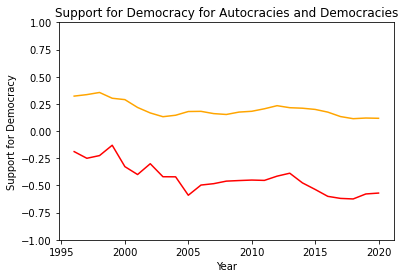

In [160]:
year_dem = sup_democ_in_democ["year"]
year_aut = sup_democ_in_aut["year"]
year2 = list(set(year_dem) & set(year_aut))
plt.ylim(-1, 1)

plt.plot(year2, sup_dem, label = "Support for Demcoracy - Democratic Countries", color = "orange")
plt.plot(year2, sup_aut,label = "Support for Democracy - Autocratic Countries", color = "red")
  
plt.xlabel('Year')
plt.ylabel('Support for Democracy')
plt.title('Support for Democracy for Autocracies and Democracies')


# Spending more time in democracies increases the support for democracy however, the trend in both regimes seem to be similar
#and this cannot be explained by the time that is spent under democracy.

### Check if the data is unbalanced

In [161]:
#each year how many autocratic country there are.
each_year_autocratic = output1[output1["regime"]==0].groupby("year")["country"].count()
each_year_autocratic = each_year_autocratic.reset_index()
each_year_democratic = output1[output1["regime"]==1].groupby("year")["country"].count()
each_year_democratic = each_year_democratic.reset_index()
each_year_democratic = each_year_democratic[(each_year_democratic.year>=1990)]

In [162]:
year_data = list(set(each_year_autocratic.year) & set(each_year_democratic.year))

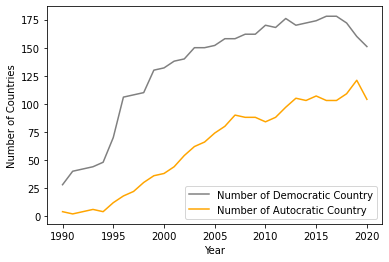

In [163]:
plt.plot(year_data, each_year_democratic.country, label="Number of Democratic Country", color="grey")
plt.plot(year_data, each_year_autocratic.country, label="Number of Autocratic Country", color = "orange")
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.legend()

In [164]:
each_year_autocratic.head()

,year,country
0,1990,4
1,1991,2
2,1992,4
3,1993,6
4,1994,4


In [169]:
output1.head()

,country,year,regime,partner_regime,SupDem,export_imf,import_imf,trade_total,fdi_out,fdi_in,fdi_total,gdp,wto,dist
0,Albania,1998,0.0,0.0,0.956827,2867.227,26531.976,29399.203,NaN,NaN,NaN,2727745.536,0.0,4797.917062
1,Albania,1998,0.0,1.0,0.956827,199912.586,755549.242,955461.828,NaN,NaN,NaN,2727745.536,0.0,6035.532893
2,Albania,1999,0.0,0.0,0.936231,1953.656,28723.825,30677.481,NaN,NaN,NaN,3434402.560,0.0,4665.455675
3,Albania,1999,0.0,1.0,0.936231,265886.010,851387.180,1117273.190,NaN,NaN,NaN,3434402.560,0.0,6110.092425
4,Albania,2000,0.0,0.0,0.903574,483.924,54009.415,54493.339,NaN,NaN,NaN,3686649.344,1.0,4957.347753
